In [16]:
import networkx as nx
g = nx.read_gpickle('example.pkl')

In [17]:
from models import Asset, AssetType, database

In [18]:
from invisibleroads_macros.security import make_random_string
make_random_string(32)

'BreQXxBLYwEgLevqk5uUKJGQ0PIrwtUa'

In [19]:
make_random_string(16)

'NdqbVDeLiaj2dUJc'

In [20]:
AssetType['Station']

<AssetType.Station: 0>

In [21]:
for n, d in g.nodes(data=True):
    geometry = d['geometry_object']
    print(geometry.wkt)
    break

POINT (-79.63188764619923 36.28222830444043)


In [7]:
# Add assets
for n, d in g.nodes(data=True):
    d = dict(d)
    asset_name = n
    type_name = d.pop('geometry_layer')
    geometry = d.pop('geometry_object')
    asset = Asset(
        id=make_random_string(16),
        name=asset_name,
        type=AssetType[type_name.capitalize()],
        geometry=geometry,
        properties=d)
    database.add(asset)
database.commit()

In [15]:
keys = set()
for n, d in g.nodes(data=True):
    keys.update(d.keys())
print(' '.join(sorted(keys)))

Branch CMainC ConnGroup DemP_kW DemQ_kVAr E_kWh Energy_kWh Equip FailRate Feeder InSettlem InvC InvCOut MVA MaxNumOut NMaxTransf NVoltLev NVolt_kV NmaxOutputs NmaxTransf Node NodeA NodeB NomV NomV_kV NumCust NumLev NumTransf OH P PMainC PMainT Phases PhasesV Pinst_kW Ppeak_kW Q Qinst_kVAr Qmax Qmin Qpeak_kVAr RArea_m2 ReliabZone Rsc Size_kVA Stage Subest Tap(pu) TapMax TapMin Tapax Type VNom Vnom1 Vnom2 Vpu Vpu_obj Xsc Xsc(pu) Y11(pu) Y12(pu) Y21(pu) Y22(pu) Yearly_kWh geometry_layer geometry_object geometry_proj4


In [8]:
asset = database.query(Asset).first()

In [9]:
asset.type

<AssetType.Meter: 5>

In [10]:
from shapely import wkb

In [11]:
a = database.query(Asset).first()
x = a.geometry
x.wkt

'POINT (-79.63188764619923 36.28222830444043)'

In [12]:
database.query(Asset).count()

20453

In [11]:
# Add connections
for name1, name2, d in g.edges(data=True):
    asset1 = database.query(Asset).filter_by(name=name1).first()
    asset2 = database.query(Asset).filter_by(name=name2).first()
    print(asset1.type_)
    asset1.connected_assets.append(asset2)

In [12]:
database.commit()

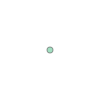

In [13]:
geometry

In [18]:
database.query(Asset).filter_by(_geometry=geometry.wkt).first().name

'S_nSSEE2_12.47'

In [22]:
for line_asset in database.query(Asset).filter_by(type=AssetType.Line):
    line = line_asset.geometry
    print(line.coords)
    break

In [20]:
# Add contents
from shapely.geometry import Point

# For each line, add pole at each point
for line_asset in database.query(Asset).filter_by(type=AssetType.Line):
    line = line_asset.geometry
    for xy in line.coords:
        print(xy)
        point = Point(xy)
        pole_asset = database.query(Asset).filter_by(_geometry=point.wkt).first()
        if not pole_asset:
            pole_asset = Asset(
                id=make_random_string(16),
                name='Pole %s' % id,
                type=AssetType.Pole,
                geometry=point)
            database.add(pole_asset)
        line.contained_assets.append(pole_asset)
database.commit()

In [21]:
database.query(Asset).count()

20453

In [ ]:
# find assets that are close to each other